In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

### Problem: The iris dataset

1. do a train-test split of the data
1. do EDA and pairplot on the training data
1. Make a linear regression model from the training data with target of `sepal_length` based on the other four variables
    * Are all of the coefficients significant at the 10% level?
1. Make a linear regression model from the training data with target of `petal_width` based on the other four variables
1. Compute the mean_squared_error and r2_score using the *test data* for your two models above.

In [3]:
filename = 'iris.csv'
path = os.path.join('..', 'data')
filepath = os.path.join(path, filename)
iris = pd.read_csv(filepath)
iris.head()  #need to get rid of unamed column, which is an old index column

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris = iris.drop('Unnamed: 0', axis='columns')

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
def statmodels_split(df, stratify=None, **kwargs):
    """
    Inputs
        df: pandas dataframe.
            if stratify is None, target column MUST be the first column in the dataframe
        
        stratify: target, as pandas Series or None
    
    Returns: 
        Tuple of dataframes (df_train, df_test) 
    """

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [19]:
train, test = statmodels_split(iris, test_size=0.2, stratify=iris['species'])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 112 to 77
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 74 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
 4   species       30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [22]:
train['species'].value_counts()

setosa        40
versicolor    40
virginica     40
Name: species, dtype: int64

In [23]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.830833,3.046667,3.765833,1.202500
std,0.840847,0.440956,1.760037,0.770732
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


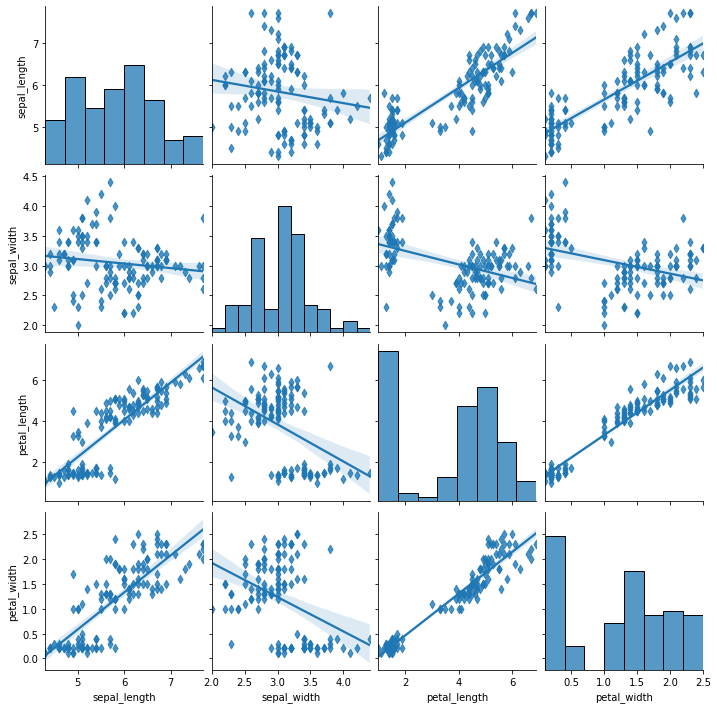

In [26]:
sns.pairplot(train, kind='reg', markers='d')

In [27]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [28]:
formula = 'sepal_length ~ sepal_width + petal_length + petal_width + C(species)'
iris_model_1 = smf.ols(formula=formula, data=train).fit()

In [29]:
iris_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           6.34e-47
Time:                        13:59:35   Log-Likelihood:                -31.111
No. Observations:                 120   AIC:                             74.22
Df Residuals:                     114   BIC:                             90.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.2310      0.324      6.887      0.000       1.589       2.873
C(species)[T.versicolor]    -0.8570      0.277     -3.092      0.003      -1.406      -0.308
C(species)[T.virginica]     -1.1722      0.383     -3.058      0.003      -1.932      -0.413
sepal_width                  0.4597      0.099      4.656      0.000       0.264       0.655
petal_length                 0.8365      0.078     10.758      0.000       0.682       0.991
petal_width                 -0.2282      0.180     -1.270      0.207      -0.584       0.128
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.956
Skew:                          -0.085   Prob(JB):                        0.620
Kurtosis:                       2.597   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Petal_width is NOT significant at the 10% level in this model

In [30]:
predictions = iris_model_1.predict(test)

In [31]:
predictions

74     6.007446
80     5.404993
19     5.163984
43     5.041286
61     5.924121
69     5.534611
21     5.095200
128    6.551181
109    7.245893
1      4.735428
25     4.902735
35     4.660053
131    7.702876
16     5.019824
99     5.794175
7      5.002942
136    6.758516
78     6.129115
125    7.138110
89     5.572627
36     4.881601
64     5.421875
108    6.649048
133    6.269828
50     6.457135
104    6.787599
103    6.665602
79     5.268782
49     4.873324
127    6.125996
dtype: float64

In [32]:
r2_score(test['sepal_length'], predictions)

0.8934948464159186

In [33]:
mean_squared_error(test['sepal_length'], predictions)

0.06368534828089918

In [34]:
iris_model_2 = smf.ols(formula='petal_width ~ sepal_length + petal_length + sepal_width + C(species)', data=train).fit()

In [35]:
iris_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     487.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.70e-75
Time:                        14:11:55   Log-Likelihood:                 47.931
No. Observations:                 120   AIC:                            -83.86
Df Residuals:                     114   BIC:                            -67.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5225      0.193     -2.702      0.008      -0.906      -0.139
C(species)[T.versicolor]     0.6815      0.135      5.048      0.000       0.414       0.949
C(species)[T.virginica]      1.1150      0.178      6.263      0.000       0.762       1.468
sepal_length                -0.0611      0.048     -1.270      0.207      -0.156       0.034
petal_length                 0.2190      0.053      4.107      0.000       0.113       0.325
sepal_width                  0.2159      0.052      4.157      0.000       0.113       0.319
==============================================================================
Omnibus:                        8.168   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.945
Skew:                          -0.267   Prob(JB):                      0.00155
Kurtosis:                       4.518   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sepal_length is NOT significant at the 10% level in this model

In [22]:
iris_model_2.params

Intercept                  -0.336978
C(species)[T.versicolor]    0.537977
C(species)[T.virginica]     0.905429
sepal_length               -0.100991
petal_length                0.272411
sepal_width                 0.202971
dtype: float64

In [36]:
predictions_2 = iris_model_2.predict(test)

In [37]:
r2_score(test['petal_width'], predictions_2)

0.944106478596047

In [38]:
mean_squared_error(test['petal_width'], predictions_2)

0.029576367370465054

### Problem: The penguin dataset

1. do a train-test split of the data
1. do EDA and pairplot on the training data
1. Make a linear regression model from the training data with target of `flipper_length` based on the other featurees. Note that some of the features are categorical.
    * Are NaNs allowed in statsmodels objects?
    * Are all of the coefficients significant at the 10% level?
1. Compute the mean_squared_error and r2_score using the *test data* for your two models above.

In [4]:
filename = 'penguins.csv'
path = os.path.join('..', 'data')
filepath = os.path.join(path, filename)

penguins = pd.read_csv(filepath)
penguins = penguins.drop('Unnamed: 0', axis='columns')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins.dropna(inplace=True) #get rid of NA rows prior to split

In [6]:
train, test = statmodels_split(penguins, test_size=0.2, stratify=penguins['species'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 263 to 200
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             266 non-null    object 
 1   bill_length_mm     266 non-null    float64
 2   bill_depth_mm      266 non-null    float64
 3   flipper_length_mm  266 non-null    float64
 4   body_mass_g        266 non-null    float64
 5   sex                266 non-null    object 
 6   species            266 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.6+ KB


In [8]:
train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,266.000000,266.000000,266.000000,266.000000
mean,43.880075,17.161278,200.913534,4197.932331
std,5.539636,1.940017,13.825463,808.866229
min,32.100000,13.200000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.600000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6050.000000


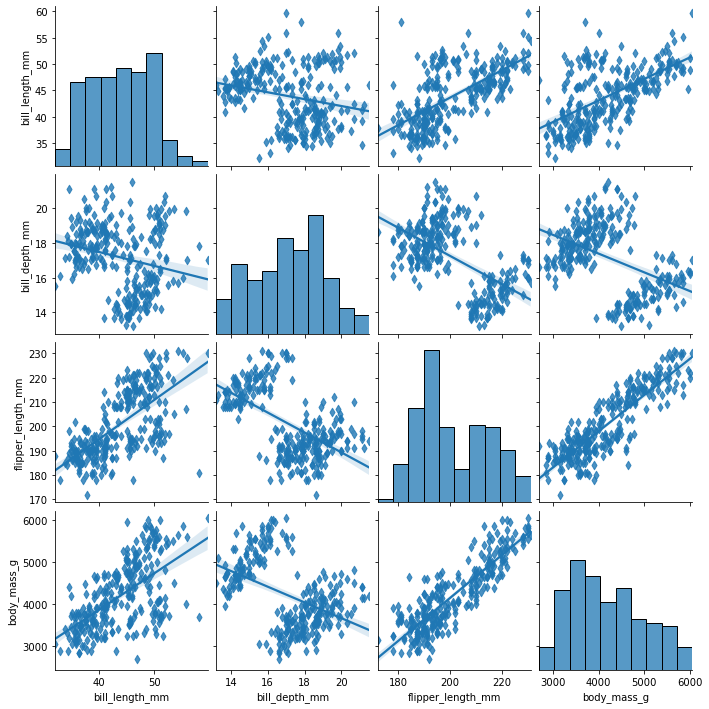

In [9]:
sns.pairplot(train, kind='reg', markers='d')

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

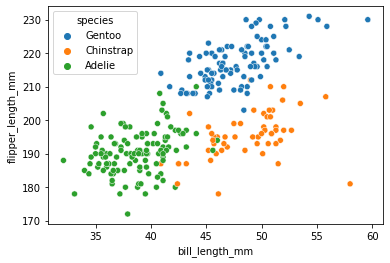

In [12]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=train, hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

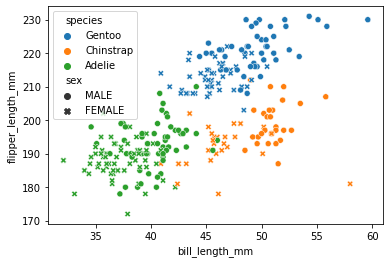

In [13]:
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=train, hue='species', style='sex')

In [14]:
train.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'species'],
      dtype='object')

In [15]:
formula = 'flipper_length_mm ~ C(island) + bill_length_mm + bill_depth_mm + body_mass_g + C(sex) + C(species)'

penguins_model = smf.ols(formula='flipper_length_mm ~ C(island) + bill_length_mm +'
               'bill_depth_mm + body_mass_g + C(sex) + C(species)', data=train).fit()

In [16]:
penguins_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          1.95e-106
Time:                        14:40:25   Log-Likelihood:                -810.84
No. Observations:                 266   AIC:                             1640.
Df Residuals:                     257   BIC:                             1672.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 142.6954      7.791     18.314      0.000     127.352     158.039
C(island)[T.Dream]          1.2605      1.160      1.087      0.278      -1.023       3.545
C(island)[T.Torgersen]      3.0136      1.232      2.446      0.015       0.587       5.440
C(sex)[T.MALE]              0.5562      1.050      0.530      0.597      -1.512       2.624
C(species)[T.Chinstrap]     1.9334      1.739      1.112      0.267      -1.491       5.358
C(species)[T.Gentoo]       19.8014      2.734      7.241      0.000      14.417      25.186
bill_length_mm              0.3273      0.139      2.358      0.019       0.054       0.601
bill_depth_mm               0.7016      0.410      1.713      0.088      -0.105       1.508
body_mass_g                 0.0055      0.001      5.116      0.000       0.003       0.008
==============================================================================
Omnibus:                        5.643   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.658
Skew:                          -0.185   Prob(JB):                       0.0358
Kurtosis:                       3.681   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
penguins_preds = penguins_model.predict(test)

In [18]:
r2_score(test['flipper_length_mm'], penguins_preds)

0.8694771001059247

In [20]:
mean_squared_error(test['flipper_length_mm'], penguins_preds)

28.367984883995355